In [1]:
print(f"------------------------------------------------------------------------------")
print(f"PROYEK AKHIR BIG DATA & DATA MINING (ST168)")
print(f"Analisis Prediksi Biaya Medis Personal Menggunakan Random Forest Regression")
print(f"------------------------------------------------------------------------------")
print(f"Nama  : Ahmad Natsrul Ulum")
print(f"NIM   : 23.11.5524")
print(f"Kelas : 23S1IF-BigData3")

------------------------------------------------------------------------------
PROYEK AKHIR BIG DATA & DATA MINING (ST168)
Analisis Prediksi Biaya Medis Personal Menggunakan Random Forest Regression
------------------------------------------------------------------------------
Nama  : Ahmad Natsrul Ulum
NIM   : 23.11.5524
Kelas : 23S1IF-BigData3


In [2]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Konfigurasi Visualisasi
sns.set(style="whitegrid")
plt.rcParams['figure.dpi'] = 100

In [3]:
# 2. Load Dataset
try:
    df = pd.read_csv('insurance.csv')
    print("Dataset berhasil dimuat!")
    print(f"Dimensi Data: {df.shape[0]} baris, {df.shape[1]} kolom")

    # Menampilkan sampel data untuk pemeriksaan awal
    print("\nSampel Data Awal:")
    display(df.head())

except FileNotFoundError:
    print("Error: File 'insurance.csv' tidak ditemukan. Mohon upload file terlebih dahulu.")

Dataset berhasil dimuat!
Dimensi Data: 1338 baris, 7 kolom

Sampel Data Awal:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# 3. Data Profiling dan Preprocessing
print(f"------------------------------------------------------")
print("3. DATA PREPROCESSING")
print(f"------------------------------------------------------")

# a. Cek Missing Values
print(f"Jumlah Missing Values: {df.isnull().sum().sum()}")

# b. Encoding Variabel Kategorikal
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])       # female=0, male=1
df['smoker'] = le.fit_transform(df['smoker']) # no=0, yes=1
df['region'] = le.fit_transform(df['region']) # northeast=0, dst..

# Memastikan tipe data integer untuk visualisasi
df['smoker'] = df['smoker'].astype(int)

print("Data setelah encoding (Siap Modeling):")
display(df.head())

------------------------------------------------------
3. DATA PREPROCESSING
------------------------------------------------------
Jumlah Missing Values: 0
Data setelah encoding (Siap Modeling):


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


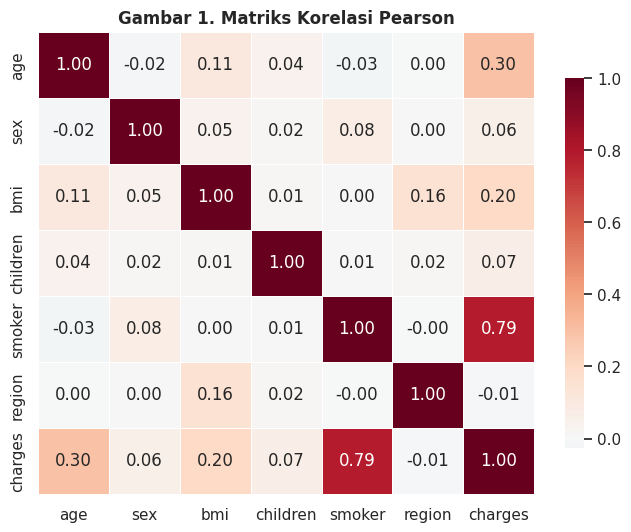

In [5]:
# 4.1. Heatmap Korelasi
plt.figure(figsize=(8, 6))

# Warna: Merah (Korelasi Tinggi) - Biru (Rendah)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), annot=True, cmap='RdBu_r', center=0,
                      fmt=".2f", linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Gambar 1. Matriks Korelasi Pearson', fontsize=12, fontweight='bold')
plt.show()

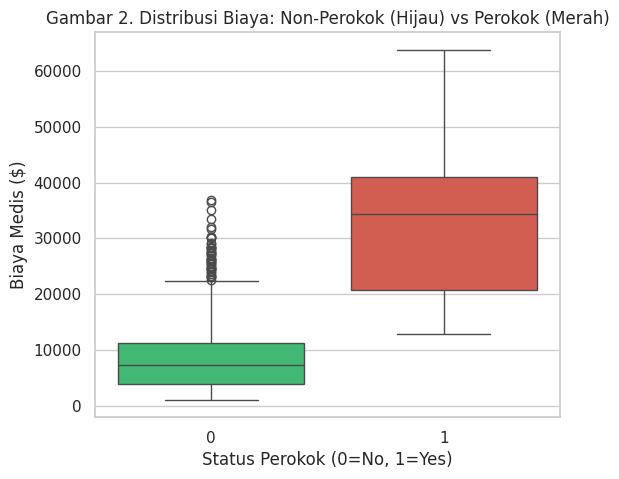

In [6]:
# 4.2. Boxplot (Smoker vs Charges)
plt.figure(figsize=(6, 5))

# 0 (Hijau/Sehat), 1 (Merah/Risiko)
custom_palette = {0: "#2ecc71", 1: "#e74c3c"}

sns.boxplot(x='smoker', y='charges', data=df,
            hue='smoker', palette=custom_palette, legend=False)

plt.title('Gambar 2. Distribusi Biaya: Non-Perokok (Hijau) vs Perokok (Merah)', fontsize=12)
plt.xlabel('Status Perokok (0=No, 1=Yes)')
plt.ylabel('Biaya Medis ($)')
plt.show()

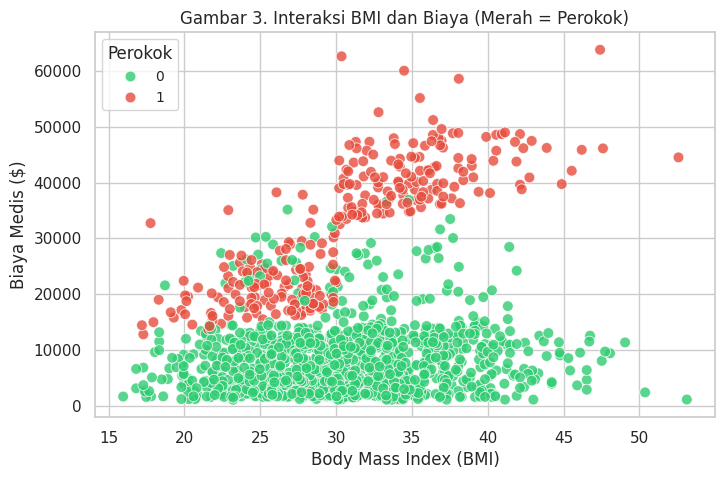

In [7]:
# 4.3. Scatterplot (BMI vs Charges hue Smoker)
plt.figure(figsize=(8, 5))

custom_palette = {0: "#2ecc71", 1: "#e74c3c"}

sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df,
                palette=custom_palette, alpha=0.8, s=60)

plt.title('Gambar 3. Interaksi BMI dan Biaya (Merah = Perokok)', fontsize=12)
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Biaya Medis ($)')
plt.legend(title='Perokok', loc='upper left', fontsize='small')
plt.show()

In [8]:
# 5. Modeling (Random Forest)
print(f"------------------------------------------------------")
print("5. MODEL TRAINING")
print(f"------------------------------------------------------")

# a. Feature Selection
X = df.drop(columns=['charges']) # Features
y = df['charges']                # Target

# b. Splitting Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# c. Train Model (100 Trees)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Model Random Forest berhasil dilatih.")

# d. Prediction
y_pred = rf_model.predict(X_test)

------------------------------------------------------
5. MODEL TRAINING
------------------------------------------------------
Model Random Forest berhasil dilatih.


------------------------------------------------------
6. EVALUATION METRICS
------------------------------------------------------
Metric     | Value          
-------------------------
MAE        | 2533.6746
RMSE       | 4590.5735
R2 Score   | 0.8643


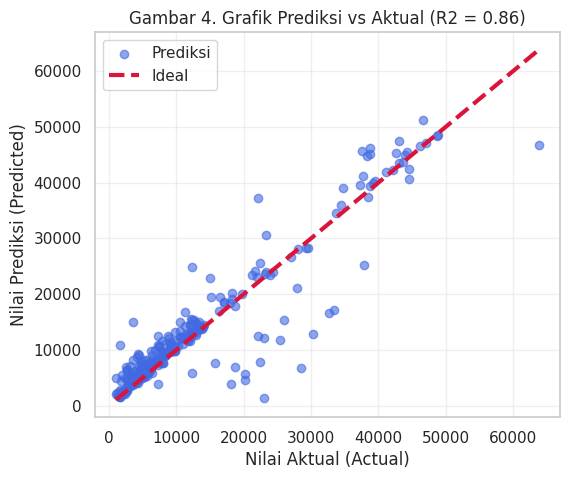

In [9]:
# 6. Evaluasi Model
print(f"------------------------------------------------------")
print("6. EVALUATION METRICS")
print(f"------------------------------------------------------")

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"{'Metric':<10} | {'Value':<15}")
print("-" * 25)
print(f"{'MAE':<10} | {mae:.4f}")
print(f"{'RMSE':<10} | {rmse:.4f}")
print(f"{'R2 Score':<10} | {r2:.4f}")

# Grafik Prediksi vs Aktual
plt.figure(figsize=(6, 5))

# Titik Prediksi (Biru) vs Garis Ideal (Merah)
plt.scatter(y_test, y_pred, color='#4169E1', alpha=0.6, label='Prediksi')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='#DC143C', lw=3, linestyle='--', label='Ideal')

plt.xlabel('Nilai Aktual (Actual)')
plt.ylabel('Nilai Prediksi (Predicted)')
plt.title('Gambar 4. Grafik Prediksi vs Aktual (R2 = 0.86)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [10]:
# 7. Feature Importance
print(f"------------------------------------------------------")
print("7. FEATURE IMPORTANCE")
print(f"------------------------------------------------------")

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)

------------------------------------------------------
7. FEATURE IMPORTANCE
------------------------------------------------------
smoker      0.608618
bmi         0.216291
age         0.134554
children    0.020199
region      0.013926
sex         0.006412
dtype: float64


In [11]:
# 8. Simulasi Prediksi Manual
print("--- TEST PREDIKSI MANUAL ---")

# Skenario: 2 Pasien Profil Sama (Wanita, 19th, BMI 27.9)
# Perbedaan: Perokok (1) vs Non-Perokok (0)

# Format: [age, sex, bmi, children, smoker, region]
pasien_perokok = [[19, 0, 27.9, 0, 1, 0]]
pasien_sehat   = [[19, 0, 27.9, 0, 0, 0]]

# Prediksi
harga_perokok = rf_model.predict(pasien_perokok)[0]
harga_sehat   = rf_model.predict(pasien_sehat)[0]

print(f"\nEstimasi Tagihan Pasien A (Perokok)     : ${harga_perokok:,.2f}")
print(f"Estimasi Tagihan Pasien B (Non-Perokok) : ${harga_sehat:,.2f}")

print("\nInsight: Gaya hidup merokok berdampak signifikan pada kenaikan premi.")

--- TEST PREDIKSI MANUAL ---

Estimasi Tagihan Pasien A (Perokok)     : $17,367.87
Estimasi Tagihan Pasien B (Non-Perokok) : $2,545.49

Insight: Gaya hidup merokok berdampak signifikan pada kenaikan premi.


/home/arul/Documents/SEM5/bddm/UAS/medical-cost-prediction/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/arul/Documents/SEM5/bddm/UAS/medical-cost-prediction/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [12]:
# 9. Menyimpan Model
import joblib

joblib.dump(rf_model, 'model_random_forest.pkl')
print("Model berhasil disimpan sebagai 'model_random_forest.pkl'")

Model berhasil disimpan sebagai 'model_random_forest.pkl'
